# Optimizing specific fluxonium property
## Relaxation time at sweet spot

In [152]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
import plotting_settings
from scipy.optimize import minimize

In [153]:
N = 30 #number of levels
E_C = 1 #Charging energy, GHz
level_num = 10
phi = 0.5

h = 6.626e-34 #Planck constant
kB = 1.38e-23 #Boltzmann constant
T_diel = 20e-3 #effective temperature in K
T_qp = 20e-3 #effective temperature in K
Q_cap = 0.5e6
Q_qp = 1e8

In [154]:
def gamma1(x):
    E_L = x[0]
    E_J = x[1]
    H = fluxonium.bare_hamiltonian(N, E_L, E_C, E_J, phi*2*np.pi) #Hamiltonian
    freq = H.eigenenergies()[1] - H.eigenenergies()[0] #transition freq
    thermal_factor_diel = (1+np.exp(-h*freq*1e9/(kB*T_diel)))
    thermal_factor_qp = (1+np.exp(-h*freq*1e9/(kB*T_qp)))
    p_me = fluxonium.phase_matrix_element(N, E_L, E_C, E_J, phi*2*np.pi, 0, 1) #Matrix element
    gamma_cap = fluxonium.relaxation_rate_cap(E_L, E_C, E_J, Q_cap,freq, p_me, T_diel)*thermal_factor_diel
    gamma_qp = fluxonium.relaxation_rate_qp_array(E_L, E_C, E_J, Q_qp, freq, p_me)*thermal_factor_qp
    return abs(p_me)

In [155]:
# x0 = [1.0,4.0]
# opt = minimize(gamma1, x0, method='Powell', tol = 1e-1)
# print (opt)

In [156]:
E_L_array = np.linspace(0.2,2,181)
E_J_array = np.linspace(0.2,10,161)
gamma = np.zeros((len(E_J_array), len(E_L_array), 2), dtype = complex)
def gamma1(E_L, E_J):
    H = fluxonium.bare_hamiltonian(N, E_L, E_C, E_J, phi*2*np.pi) #Hamiltonian
    freq = H.eigenenergies()[1] - H.eigenenergies()[0] #transition freq
    thermal_factor_diel = (1+np.exp(-h*freq*1e9/(kB*T_diel)))
    thermal_factor_qp = (1+np.exp(-h*freq*1e9/(kB*T_qp)))
    p_me = fluxonium.phase_matrix_element(N, E_L, E_C, E_J, phi*2*np.pi, 0, 1) #Matrix element
    gamma_cap = fluxonium.relaxation_rate_cap(E_L, E_C, E_J, Q_cap,freq, p_me, T_diel)*thermal_factor_diel
    gamma_qp = fluxonium.relaxation_rate_qp_array(E_L, E_C, E_J, Q_qp, freq, p_me)*thermal_factor_qp
    return gamma_cap, gamma_qp

for J_idx, E_J in enumerate(E_J_array):
    for L_idx, E_L in enumerate(E_L_array):
        gamma[J_idx, L_idx, :] = gamma1(E_L, E_J)

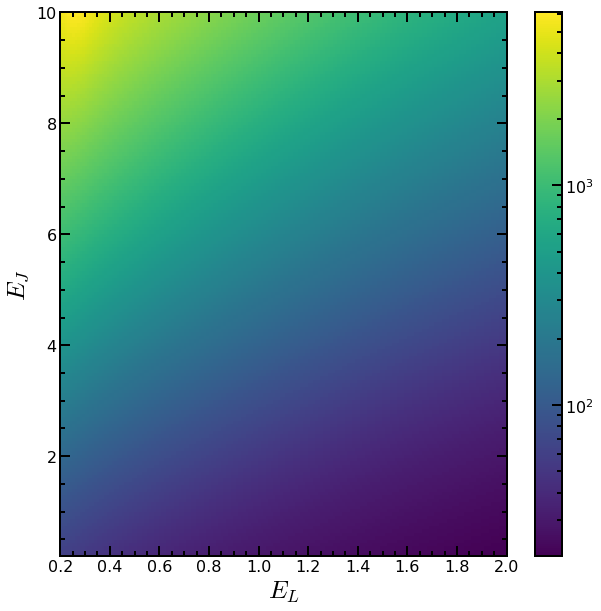

In [162]:
plt.figure(figsize=[10,10])
import matplotlib.colors as cl
plt.xlabel(r'$E_L$')
plt.ylabel(r'$E_J$')
X,Y = np.meshgrid(E_L_array, E_J_array)
Z = abs(gamma[:,:,0])
plt.pcolormesh(X,Y,(Z**-1)*1e6,norm=cl.LogNorm())
plt.colorbar()

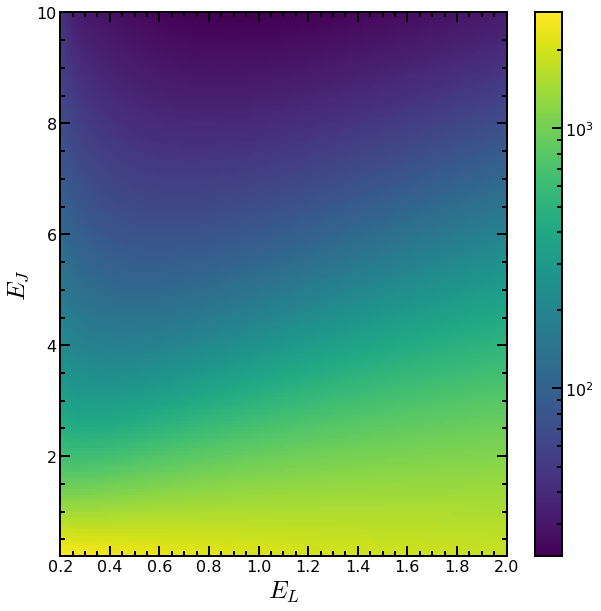

In [163]:
plt.figure(figsize=[10,10])
plt.xlabel(r'$E_L$')
plt.ylabel(r'$E_J$')
X,Y = np.meshgrid(E_L_array, E_J_array)
Z = abs(gamma[:,:,1])
plt.pcolormesh(X,Y,(Z**-1)*1e6,norm=cl.LogNorm())
plt.colorbar()

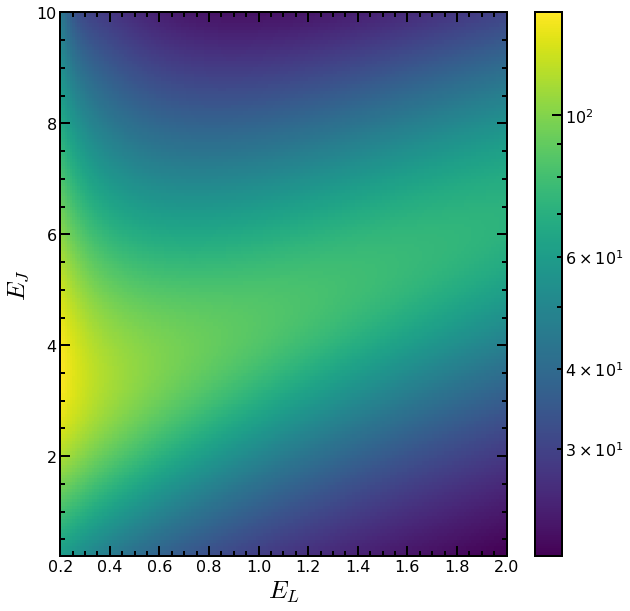

In [165]:
plt.figure(figsize=[10,10])
plt.xlabel(r'$E_L$')
plt.ylabel(r'$E_J$')
X,Y = np.meshgrid(E_L_array, E_J_array)
Z = abs(gamma[:,:,1])+abs(gamma[:,:,0])
plt.pcolormesh(X,Y,(Z**-1)*1e6,norm=cl.LogNorm())
plt.colorbar()